Ocena 3.0

Potencjał Lennarda-Jonesa precyzyjnie opisuje energię oddziaływań między niezwiązanymi atomami, charakteryzując się następującymi cechami:
• Pary atomów umiejscowione zbyt blisko siebie są surowo karane energetycznie.

• Atomy znajdujące się w odległości równiej parametrowi r0 osiągają równowagę między siłami przyciągania i odpychania.

• W przypadku atomów odległych od siebie energia jest niemal zerowa, co oznacza, że siły oddziaływania są nieznaczące.

• Najbardziej faworyzowane jest położenie atomów w odległości 1.122r0, gdzie energia równa jest −ε


Zaimplementuj liczenie energii wg potencjału Lennarda-Jonesa dla par niezwiązanych atomów węgla,
dla których parametry to:
ε = 0.086kcal/mol
r0 = 3.4Å

Napisz program, który oblicza sumę energii Lennarda-Jonesa dla par atomów węgla między dwoma nukleotydami, uwzględniając wszystkie kombinacje takich par. Następnie uruchom ten program dla 100 przykładów znajdujących się w katalogu “lj”. Posortuj wyniki według rosnącej wartości energii. Na koniec zaprezentuj w PyMOL struktury o najniższej i najwyższej energii, aby wizualnie porównać ich właściwości.

In [ ]:
import os
import numpy as np
import pandas as pd
from Bio.PDB import PDBParser

epislon = 0.086 
r0 = 3.4

def lennard_jones(r, epsilon=epislon, r0=r0):

    return 4 * epsilon * ((r0 / r) ** 12 - (r0 / r) ** 6)

def parse(file_path):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("structure", file_path)
    
    cyt_coords = []
    gua_coords = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                residue_name = residue.get_resname()
                for atom in residue:
                    atom_name = atom.get_name()
                    if residue_name == "G" and "C" in atom_name: 
                        gua_coords.append(atom.coord)
                    elif residue_name == "C" and "C" in atom_name: 
                        cyt_coords.append(atom.coord)
    return np.array(cyt_coords), np.array(gua_coords)

def calculate_cytgua(file_path):
    cyt_coords, gua_coords = parse(file_path)
    total_energy = 0.0
    for cyt_coo in cyt_coords:
        for gua_coo in gua_coords:
            r = np.linalg.norm(cyt_coo - gua_coo)  
            if r > 0:  
                total_energy += lennard_jones(r)
    return total_energy

def process_files(directory_path):
    results = []
    files = [f for f in os.listdir(directory_path) if f.endswith('.pdb')]
    
    for file in files:
        file_path = os.path.join(directory_path, file)
        total_energy = calculate_cytgua(file_path)
        results.append((file, total_energy))
    
    sorted_results = sorted(results, key=lambda x: x[1])
    return sorted_results

path = "lj" 
sorted_energies = process_files(path) 
    
df_sorted_results = pd.DataFrame(sorted_energies, columns=["File", "Energy (kcal/mol)"])
df_sorted_results.sort_values(by="Energy (kcal/mol)", ascending=True, inplace=True)
print(df_sorted_results)
   


      File     Energy (kcal/mol)
0   GC_33.pdb   -1.675038e+00   
1   GC_53.pdb   -3.253016e-01   
2   GC_49.pdb   -2.975319e-01   
3   GC_34.pdb   -1.911461e-01   
4    GC_4.pdb   -1.420149e-01   
5   GC_55.pdb   -1.119167e-01   
6   GC_76.pdb   -5.072920e-02   
7    GC_1.pdb   -4.959192e-02   
8   GC_74.pdb   -4.105606e-02   
9   GC_67.pdb   -3.928134e-02   
10  GC_17.pdb   -3.175012e-02   
11   GC_6.pdb   -2.720135e-02   
12  GC_73.pdb   -2.642499e-02   
13   GC_2.pdb   -2.553608e-02   
14  GC_43.pdb   -2.114821e-02   
15   GC_8.pdb   -1.919835e-02   
16  GC_89.pdb   -1.613536e-02   
17  GC_14.pdb   -1.433162e-02   
18  GC_99.pdb   -1.274231e-02   
19  GC_62.pdb   -9.951529e-03   
20  GC_46.pdb   -9.908800e-03   
21  GC_84.pdb   -8.080700e-03   
22  GC_86.pdb   -6.734698e-03   
23  GC_58.pdb   -6.572275e-03   
24  GC_71.pdb   -5.940368e-03   
25  GC_36.pdb   -4.712215e-03   
26  GC_19.pdb   -3.443599e-03   
27  GC_27.pdb   -3.146628e-03   
28  GC_81.pdb   -3.046287e-03   
29  GC_98.

Najniższa energia gc33:[![GC_33](gc33.png)]

Najwyższa energia gc96:[![GC_96](gc96.png)]

Ocena 3.5

Dla danych z poprzedniego zadania, określ medianę wartości energii, która będzie oznaczona jako U(y).

Dla uporządkowanej listy energii, oblicz relatywne prawdopodobieństwo dla każdej pozycji.

Stała Boltzmanna wynosi kB = 1.987204259 × 10−3 kcal/mol. Ustal temperaturę na T = 300 K.


In [ ]:

kB = 1.987204259e-3
T = 300 

median_energy = np.median(df_sorted_results["Energy (kcal/mol)"])

df_sorted_results["Relative Probability"] = np.exp(
    -(df_sorted_results["Energy (kcal/mol)"] - median_energy) / (kB * T)
)

print(df_sorted_results)

      File     Energy (kcal/mol)  Relative Probability
0   GC_33.pdb   -1.675038e+00         1.659160e+01    
1   GC_53.pdb   -3.253016e-01         1.724352e+00    
2   GC_49.pdb   -2.975319e-01         1.645872e+00    
3   GC_34.pdb   -1.911461e-01         1.376879e+00    
4    GC_4.pdb   -1.420149e-01         1.267957e+00    
5   GC_55.pdb   -1.119167e-01         1.205531e+00    
6   GC_76.pdb   -5.072920e-02         1.087938e+00    
7    GC_1.pdb   -4.959192e-02         1.085865e+00    
8   GC_74.pdb   -4.105606e-02         1.070428e+00    
9   GC_67.pdb   -3.928134e-02         1.067246e+00    
10  GC_17.pdb   -3.175012e-02         1.053849e+00    
11   GC_6.pdb   -2.720135e-02         1.045838e+00    
12  GC_73.pdb   -2.642499e-02         1.044477e+00    
13   GC_2.pdb   -2.553608e-02         1.042921e+00    
14  GC_43.pdb   -2.114821e-02         1.035273e+00    
15   GC_8.pdb   -1.919835e-02         1.031892e+00    
16  GC_89.pdb   -1.613536e-02         1.026604e+00    
17  GC_14.

Ocena 4.0

Przeanalizuj pliki PDB znajdujące się w katalogu “gc”, zawierające nukleotydy G-C formujące kanoniczną parę Watson-Crick-Franklin. Skoncentruj się na wizualizacji i krótkim opisie histogramów odległości
atomowych:

• O6G − N4C

• N1G − N3C

• N2G − O2C

Aby uzyskać funkcję gęstości prawdopodobieństwa dla każdej z trzech odległości atomowych, zastosuj scipy.stats.gaussian_kde. Przedstaw te funkcje na wykresie razem z histogramem.

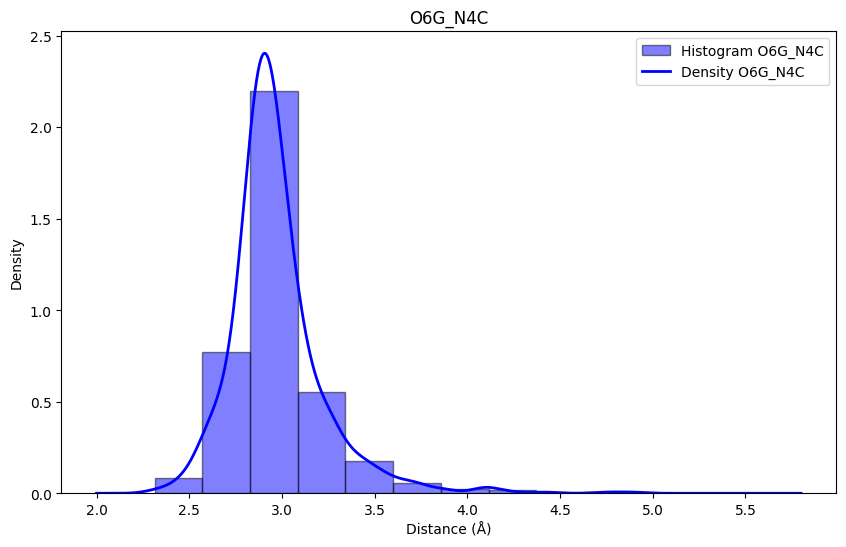

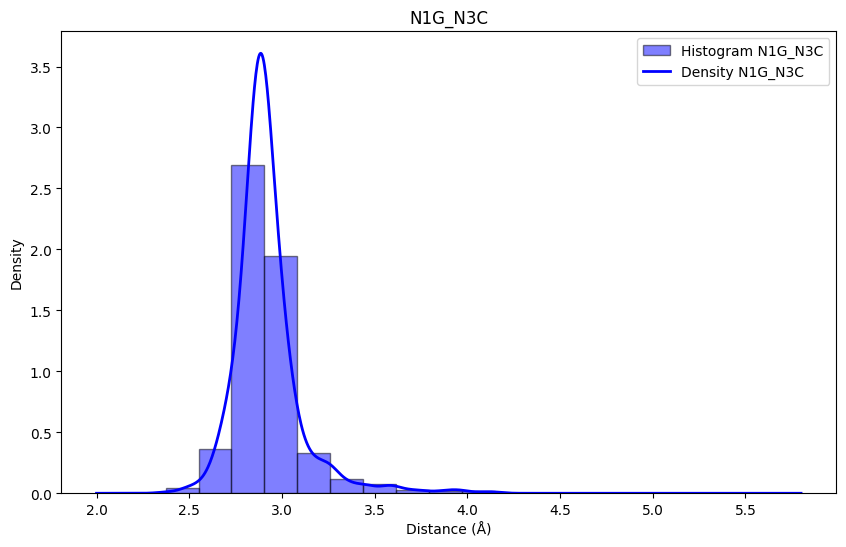

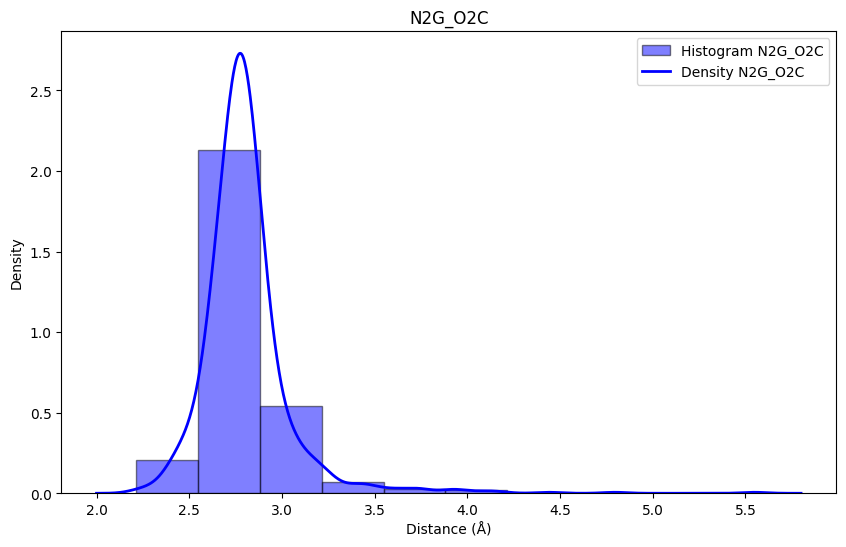

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from Bio.PDB import PDBParser
from math import sqrt

pdb= "gc"

O6G_N4C = []
N1G_N3C = []
N2G_O2C = []

parser = PDBParser(QUIET=True)

def pdb_files():
    for filename in os.listdir(pdb):
        if filename.endswith(".pdb"):
            file_path = os.path.join(pdb, filename)
            structure = parser.get_structure("nucleotide_pair", file_path)

            for model in structure:

                O6_co = None
                N1_co = None
                N2_co = None
                N4_co = None
                N3_co = None
                O2_co = None

                for chain in model:
                    for residue in chain:
                        res_name = residue.get_resname()
                        for atom in residue:
                            if atom.name == 'O6' and res_name == 'G':
                                O6_co = atom.get_coord()
                            elif atom.name == 'N1' and res_name == 'G':
                                N1_co = atom.get_coord()
                            elif atom.name == 'N2' and res_name == 'G':
                                N2_co = atom.get_coord()
                            elif atom.name == 'N4' and res_name == 'C':
                                N4_co = atom.get_coord()
                            elif atom.name == 'N3' and res_name == 'C':
                                N3_co = atom.get_coord()
                            elif atom.name == 'O2' and res_name == 'C':
                                O2_co = atom.get_coord()

                if O6_co is not None and N4_co is not None:
                    r_O6N4 = sqrt((N4_co[0] - O6_co[0])**2 + (N4_co[1] - O6_co[1])**2 + (N4_co[2] - O6_co[2])**2)
                    O6G_N4C.append(r_O6N4)

                if N1_co is not None and N3_co is not None:
                    r_N1N3 = sqrt((N3_co[0] - N1_co[0])**2 + (N3_co[1] - N1_co[1])**2 + (N3_co[2] - N1_co[2])**2)
                    N1G_N3C.append(r_N1N3)

                if N2_co is not None and O2_co is not None:
                    r_N2O2 = sqrt((O2_co[0] - N2_co[0])**2 + (O2_co[1] - N2_co[1])**2 + (O2_co[2] - N2_co[2])**2)
                    N2G_O2C.append(r_N2O2)

pdb_files()

kde_O6G_N4C = gaussian_kde(O6G_N4C, bw_method='silverman')
kde_N1G_N3C = gaussian_kde(N1G_N3C, bw_method='silverman')
kde_N2G_O2C = gaussian_kde(N2G_O2C, bw_method='silverman')

x = np.linspace(2, 5.8, 1000)  

pdf_O6G_N4C = kde_O6G_N4C(x)
pdf_N1G_N3C = kde_N1G_N3C(x)
pdf_N2G_O2C = kde_N2G_O2C(x)

def histogram_fgestosci(data, pdf, x_range, label, color):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=10, density=True, alpha=0.5, label=f'Histogram {label}', color=color, edgecolor='black')
    plt.plot(x_range, pdf, label=f'Density {label}', color=color, linewidth=2)
    plt.title(f'{label}')
    plt.xlabel('Distance (Å)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

histogram_fgestosci(O6G_N4C, pdf_O6G_N4C, x, 'O6G_N4C', 'blue')
histogram_fgestosci(N1G_N3C, pdf_N1G_N3C, x, 'N1G_N3C', 'blue')
histogram_fgestosci(N2G_O2C, pdf_N2G_O2C, x, 'N2G_O2C', 'blue')



Ocena 4.5

Zamień prawdopodobieństwo na energię poprzez transformację:

−kBT log P(x)

Podstaw funkcję gęstości prawdopodobieństwa P(x) wyznaczoną we wcześniejszym kroku do tej formuły. Wykorzystaj stałą Boltzmanna oraz temperaturę, jak w poprzednim zadaniu.

Uwaga: Logarytm nie może być obliczony dla wartości 0, dlatego stosuje się zabezpieczenie:

−kBT log[max{P(x), ϵ}]

Wartość ϵ to bardzo mała dodatnia liczba, którą można uzyskać za pomocą np.nextafter(0, 1), co zwraca najmniejszą możliwą reprezentowalną dodatnią wartość.

Wyznacz funkcje energii:

• UO6G−N4C(x)

• UN1G−N3C(x)

• UN2G−O2C(x)

• U(x) = UO6G−N4C(x) + UN1G−N3C(x) + UN2G−O2C(x)


In [3]:
import os
import math
import numpy as np
from scipy import stats
from Bio.PDB import PDBParser

kB = 1.987204259e-3 
T = 300.0
epsilon = np.nextafter(0, 1)

data = "gc"

pdb_files = [f for f in os.listdir(data) if f.endswith(".pdb")]
pdb_files.sort()

pdb_loader = PDBParser(QUIET=True)

def locate_gc_pair(structure):
    guanine_res = None
    cytosine_res = None
    for model in structure:
        for chain in model:
            for residue in chain:
                rname = residue.get_resname().strip()
                if rname == 'G':
                    guanine_res = residue
                elif rname == 'C':
                    cytosine_res = residue

    if guanine_res is None or cytosine_res is None:
        return None

    try:
        coord_O6 = guanine_res['O6'].coord
        coord_N1 = guanine_res['N1'].coord
        coord_N2 = guanine_res['N2'].coord

        coord_N4 = cytosine_res['N4'].coord
        coord_N3 = cytosine_res['N3'].coord
        coord_O2 = cytosine_res['O2'].coord
    except KeyError:
        return None

    dist = lambda a, b: np.linalg.norm(a - b)
    return dist(coord_O6, coord_N4), dist(coord_N1, coord_N3), dist(coord_N2, coord_O2)

O6N4 = []
N1N3 = []
N2O2 = []
structures_data = [] 

for pdb_name in pdb_files:
    pdb_path = os.path.join(data, pdb_name)
    current_structure = pdb_loader.get_structure(pdb_name, pdb_path)
    dist = locate_gc_pair(current_structure)
    if dist is not None:
        dO6N4, dN1N3, dN2O2 = dist
        O6N4.append(dO6N4)
        N1N3.append(dN1N3)
        N2O2.append(dN2O2)
        structures_data.append((pdb_name, (dO6N4, dN1N3, dN2O2)))

O6N4 = np.array(O6N4)
N1N3 = np.array(N1N3)
N2O2 = np.array(N2O2)

gc_data = [(sdata[0],) for sdata in structures_data]

def probability_to_energy(prob):
    return (-1) * kB * T * math.log10(max(prob, epsilon))

kde_O6N4 = stats.gaussian_kde(O6N4)
kde_N1N3 = stats.gaussian_kde(N1N3)
kde_N2O2 = stats.gaussian_kde(N2O2)

indexed_energies = []
for idx in range(len(O6N4)):
    p_val_O6N4 = kde_O6N4.pdf(O6N4[idx])[0]
    p_val_N1N3 = kde_N1N3.pdf(N1N3[idx])[0]
    p_val_N2O2 = kde_N2O2.pdf(N2O2[idx])[0]

    U_O6N4 = probability_to_energy(p_val_O6N4)
    U_N1N3 = probability_to_energy(p_val_N1N3)
    U_N2O2 = probability_to_energy(p_val_N2O2)

    U_total = U_O6N4 + U_N1N3 + U_N2O2
    indexed_energies.append((idx, U_total))

indexed_energies.sort(key=lambda item: item[1])

energy_median = np.median([e[1] for e in indexed_energies])

rel_probabilities = []
for (index_val, energy_val) in indexed_energies:
    rel_p = math.exp(-(energy_val - energy_median)/(kB*T))
    rel_probabilities.append((index_val, rel_p))

rel_map = {idx: rp for (idx, rp) in rel_probabilities}

print("Posortowano według rosnącej energii:")
print("File\t\tEnergy [kcal/mol]\tRelative Probability")
for i, (data_index, energy_val) in enumerate(indexed_energies, start=1):
    filename = gc_data[data_index][0]
    relative_p = rel_map[data_index]
    print(f"{i}. {filename}\t{energy_val:.4f}\t\t{relative_p:.6f}")


Posortowano według rosnącej energii:
File		Energy [kcal/mol]	Relative Probability
1. 335.pdb	-0.8332		1.712852
2. 339.pdb	-0.8329		1.712030
3. 333.pdb	-0.8319		1.708976
4. 543.pdb	-0.8318		1.708843
5. 544.pdb	-0.8316		1.708331
6. 539.pdb	-0.8303		1.704637
7. 340.pdb	-0.8300		1.703551
8. 331.pdb	-0.8296		1.702430
9. 422.pdb	-0.8295		1.702269
10. 336.pdb	-0.8293		1.701667
11. 662.pdb	-0.8292		1.701462
12. 329.pdb	-0.8291		1.701099
13. 97.pdb	-0.8285		1.699303
14. 334.pdb	-0.8284		1.699070
15. 532.pdb	-0.8274		1.696185
16. 661.pdb	-0.8271		1.695357
17. 323.pdb	-0.8262		1.692749
18. 522.pdb	-0.8260		1.692362
19. 668.pdb	-0.8260		1.692211
20. 657.pdb	-0.8258		1.691778
21. 439.pdb	-0.8246		1.688315
22. 446.pdb	-0.8246		1.688208
23. 689.pdb	-0.8235		1.685238
24. 195.pdb	-0.8226		1.682672
25. 963.pdb	-0.8210		1.678184
26. 921.pdb	-0.8209		1.677946
27. 553.pdb	-0.8204		1.676408
28. 669.pdb	-0.8192		1.673025
29. 808.pdb	-0.8184		1.670780
30. 63.pdb	-0.8177		1.669003
31. 122.pdb	-0.8165		1.665595